<a href="https://colab.research.google.com/github/cmn92/Predicting-Customer-Churn/blob/main/Predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Data

In [9]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download latest version of the data
path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")

print("Path to dataset files:", path)

100%|██████████| 379k/379k [00:00<00:00, 38.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1


In [3]:
# List files in the directory to find the CSV file
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['BankChurners.csv']


In [4]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(path, files[0])
df = pd.read_csv(csv_file_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [21]:
#drop the last two columns
df = df.iloc[:, :-2]
#drop "CLIENTNUM"
df = df.drop("CLIENTNUM", axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28


# Exploring the Data

In [22]:
# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object


In [23]:
# Display descriptive statistics for numerical columns in an organized table
display(df.describe())

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000


In [18]:
# Display descriptive statistics for categorical columns in an organized table
display(df.describe(include="object"))

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [24]:
# checking the NA percentage
display(df.isna().sum()/len(df)*100)

,0
Attrition_Flag,0.0
Customer_Age,0.0
Gender,0.0
Dependent_count,0.0
Education_Level,0.0
Marital_Status,0.0
Income_Category,0.0
Card_Category,0.0
Months_on_book,0.0
Total_Relationship_Count,0.0


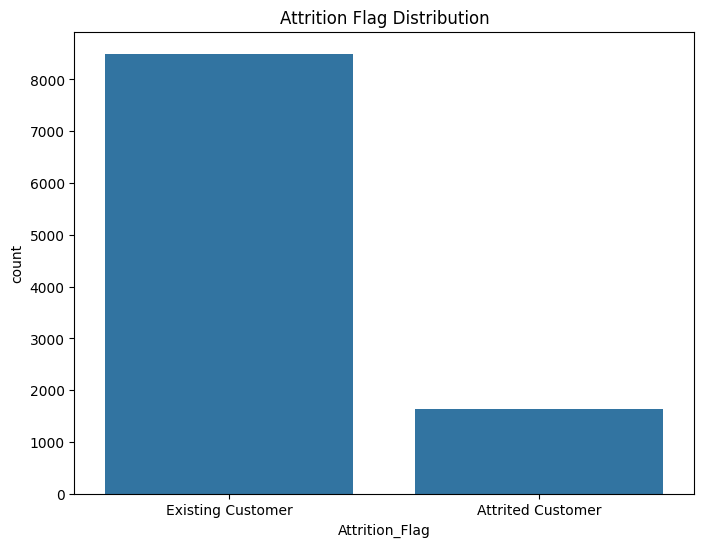

In [10]:
#Visualize the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Attrition Flag Distribution')
plt.show()

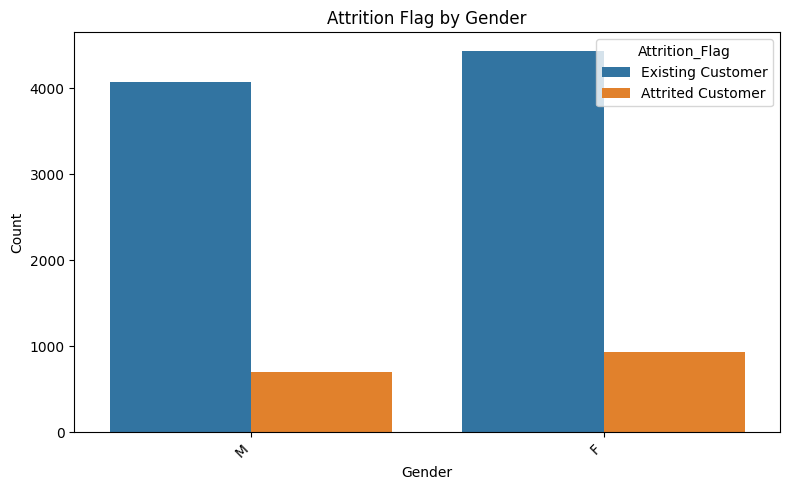

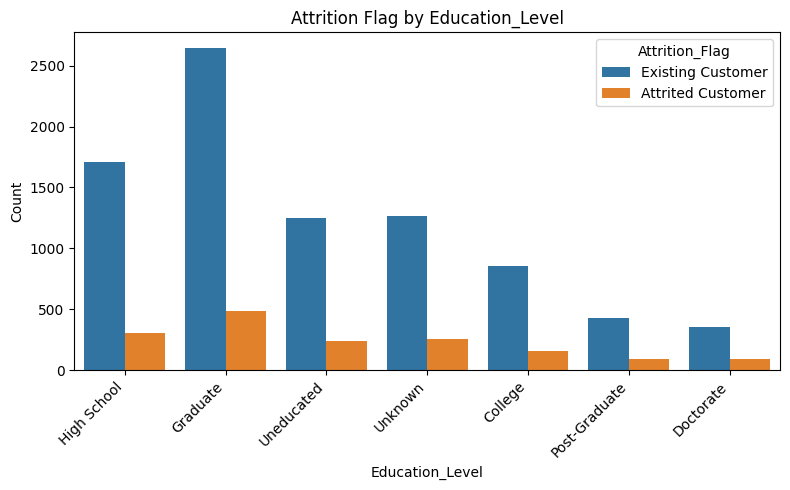

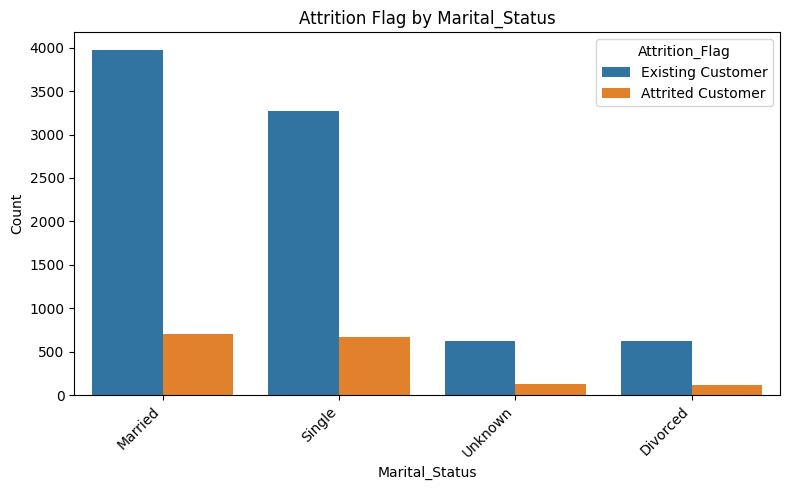

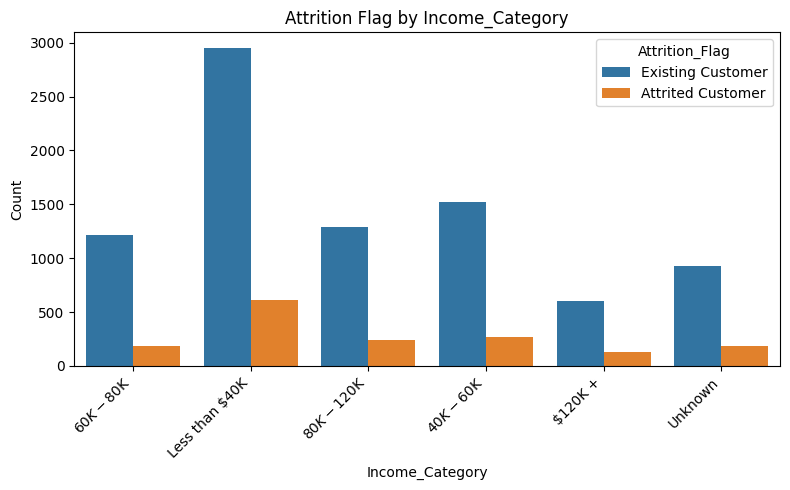

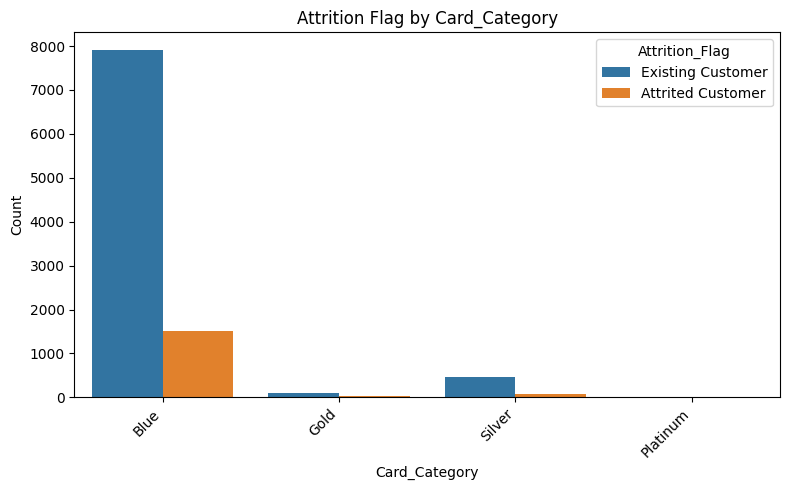

In [11]:
# Visualize the relationship between categorical features and Attrition_Flag
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Attrition_Flag')

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Attrition_Flag', data=df)
    plt.title(f'Attrition Flag by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

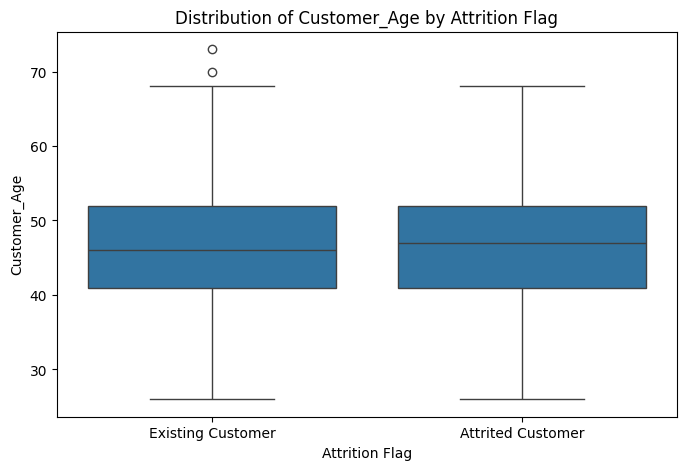

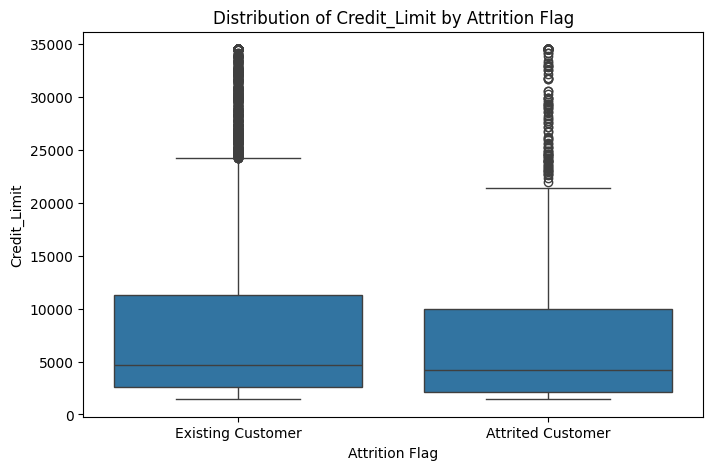

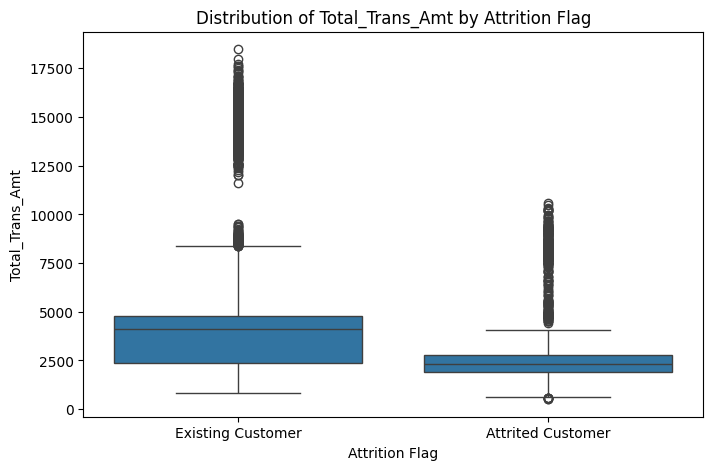

In [12]:
# Visualizing relationship numerical features with target label Attrition_Flag
numerical_cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition_Flag', y=col, data=df)
    plt.title(f'Distribution of {col} by Attrition Flag')
    plt.xlabel('Attrition Flag')
    plt.ylabel(col)
    plt.show()

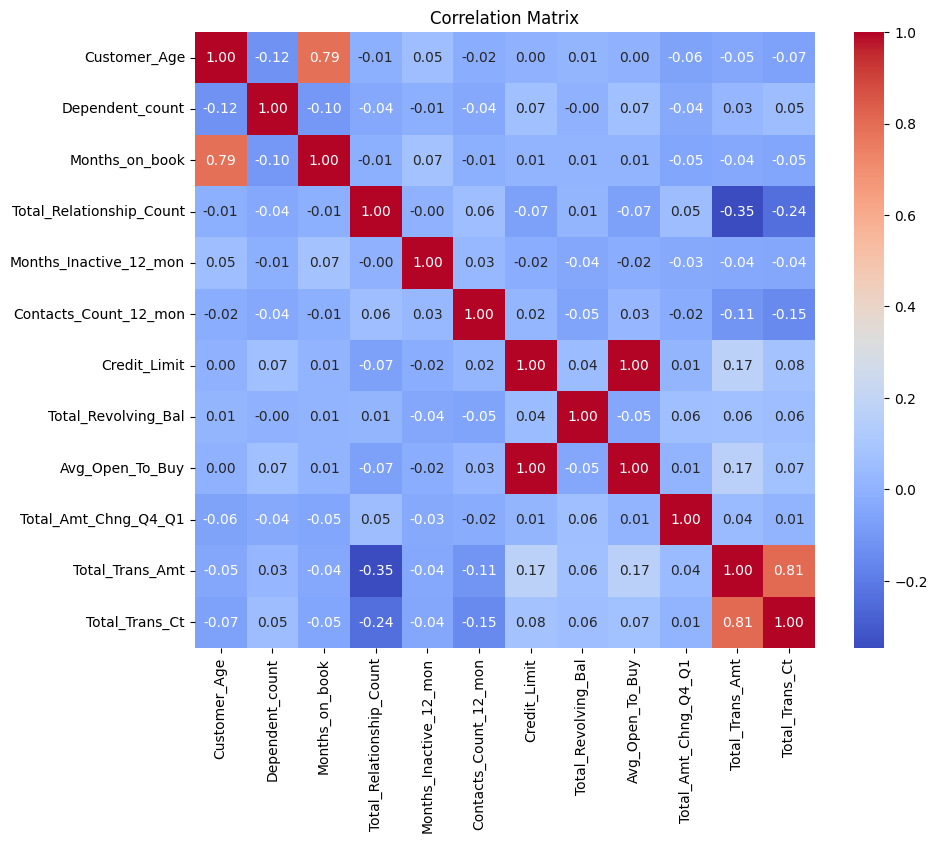

In [25]:
#Correlation between the numeric features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Preprocessing the data

In [34]:
# label encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [35]:
# Find pairs of numerical columns with correlation > 0.75
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j))

print("Highly correlated numerical column pairs (correlation > 0.75):", highly_correlated_pairs)

# Feature engineering on highly correlated pairs (e.g., create ratio or interaction terms)
for col1, col2 in highly_correlated_pairs:
    # Example: Create a ratio feature (handle division by zero)
    if (df[col2] != 0).any():  # Check if the denominator has non-zero values
        df[f'{col1}_per_{col2}'] = df[col1] / df[col2]
    else:
        print(f"Cannot create ratio for {col1}_per_{col2} due to division by zero.")

    # Example: Create an interaction feature
    df[f'{col1}_x_{col2}'] = df[col1] * df[col2]

df.head()

Highly correlated numerical column pairs (correlation > 0.75): [('Months_on_book', 'Customer_Age'), ('Avg_Open_To_Buy', 'Credit_Limit'), ('Total_Trans_Ct', 'Total_Trans_Amt')]


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [37]:
#Encode categorical features to numeric
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [38]:
#Split the data to training and test sets
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify to maintain proportion


In [39]:
# dealing with class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before resampling:", y_train.value_counts())
print("Class distribution after resampling:", y_train_resampled.value_counts())

Class distribution before resampling: Attrition_Flag
1    6799
0    1302
Name: count, dtype: int64
Class distribution after resampling: Attrition_Flag
0    6799
1    6799
Name: count, dtype: int64


In [40]:
#scaling the numerical features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols_resampled = X_train_resampled.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()
# Fit on resampled training data and transform both training and testing data
X_resampled_scaled = scaler.fit_transform(X_train_resampled[numerical_cols_resampled])
X_test_scaled = scaler.transform(X_test[numerical_cols_resampled])

# Replace original numerical columns with scaled versions
X_train_resampled[numerical_cols_resampled] = X_resampled_scaled
X_test[numerical_cols_resampled] = X_test_scaled

# Two Models to Compare

In [46]:
#training logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8963474827245804

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       325
           1       0.94      0.93      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.80      0.82      0.81      2026
weighted avg       0.90      0.90      0.90      2026



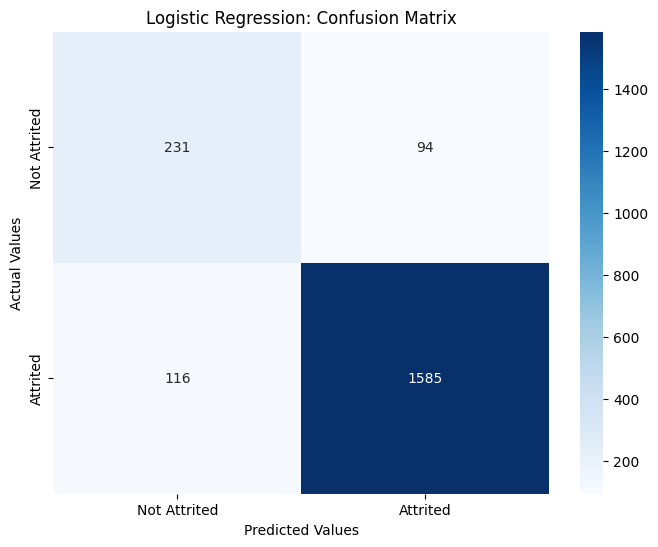

In [47]:
#plot the predictions and the test (target variable is categorical)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

In [48]:
#XGBoost
from xgboost import XGBClassifier


xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9639684106614018

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       325
           1       0.98      0.97      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026



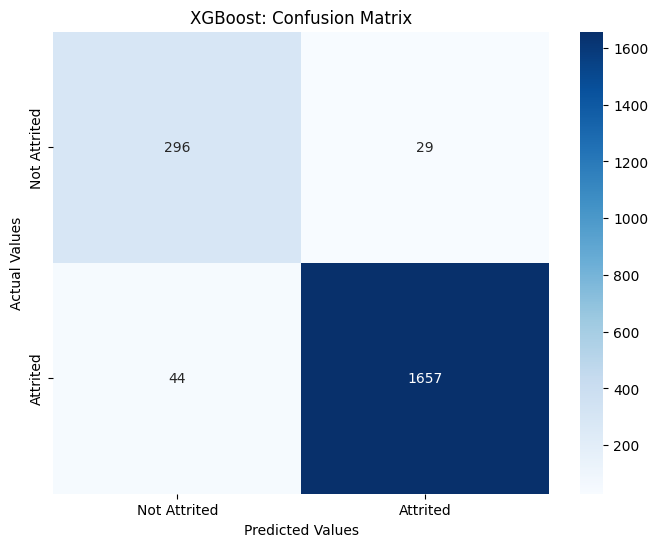

In [49]:
#plot the predictions and the test (target variable is categorical)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XGBoost: Confusion Matrix')
plt.show()